**The coefficients in the ODE that express the dependence of infectivity on the local population density**

Here we aim to show that this factor,

$$z_i f(\rho_\text{eff}^h),$$

is *almost the same for all ages $i$ and all arrondissements $g$*, hence effectively eliminating its influence.

The normalisation factor $z_i$ is defined as follows:

$$z_i = \frac{T_i}{\sum_{h=1}^G f(\rho_\text{eff}^h) T_{i,\text{eff}}^h},$$

with $T$ expressing the total population. $T_i$ is the population per age (summed over all regions).

The density-dependence is expressed in the function $f$, defined as follows:

$$f(x) = 1 + (1 - \exp(-\xi x)),$$

with $\xi = 0.01$ (from Hu 2013, referred to in the Arenas paper).

In [1]:
# Load packages
# Established packages
import os
import numpy as np
import matplotlib.pyplot as plt

# Custom package covid19model
from covid19model.models import models
from covid19model.data import model_parameters, mobility #, sciensano, google
from covid19model.visualization.output import population_status, infected, show_map, show_graphs
from covid19model.models.time_dependant_parameter_fncs import * # lockdown_func, mobility_update_func, policies_wave1_4prev

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
# This may be useful because the `covid19model` package is under construction
%autoreload 2

# Spatial stratification
agg = 'arr'

In [67]:
# Define and plot the density dependence function

def dens_dep(x, xi):
    f = 1 + (1 - np.exp(-xi * x ))
    return f

# Note: the code below is largely copied from the models.py script.
# Load all model parameters
params = model_parameters.get_COVID19_SEIRD_parameters(spatial=agg)

# Load initial (not effective) population
T, Nc_dict = model_parameters.get_integrated_willem2012_interaction_matrices(spatial=agg)

# Calculate effective population per arrondissement based on pre-pandemic mobility (census 2011)
T_eff = np.matmul(np.transpose(params['place']), T)

# Calculate total effective population per arrondissement
T_eff_total = T_eff.sum(axis=1)

# Calculate effective population density per arrondissement
rho_eff = T_eff_total / params['area']

# Calculate density dependence per arrondissement
f = dens_dep(rho_eff, params['xi'])

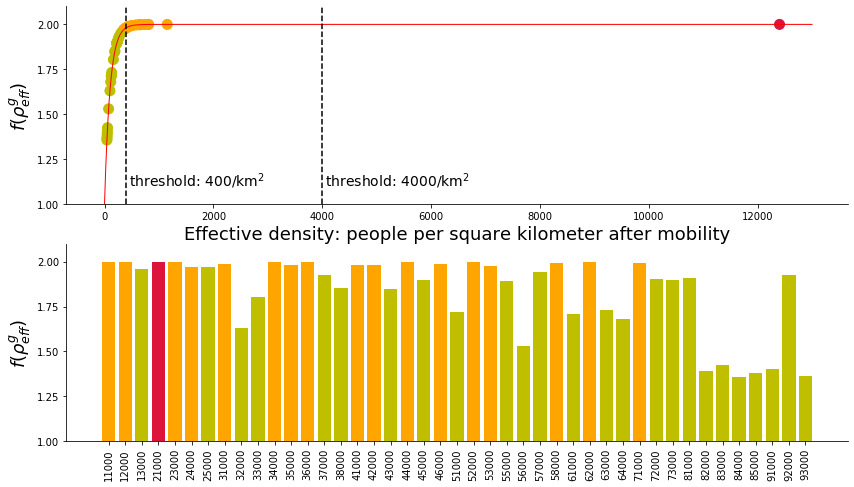

In [93]:
# NOTE: colour coding based on official (not effective) population

fig, axs = plt.subplots(2,1,figsize=(14,8))
fontsize=18
dens = np.linspace(0, 13000, 13001)
# ax.set_xlim(-100, 13000)
axs[0].set_ylim(1, 2.1)
axs[0].set_yticks([1, 1.25, 1.5, 1.75, 2])
axs[0].set_ylabel(r'$f(\rho_{eff}^g)$', fontsize=fontsize)
axs[0].set_xlabel('Effective density: people per square kilometer after mobility', fontsize=fontsize)
xi = 0.01

axs[0].plot(dens, dens_dep(dens, xi), 'r-', linewidth=1)
axs[0].scatter(rho_eff, f, c=colors, s=100)

threshold1 = 400
threshold2 = 4000
axs[0].axvline(threshold1, color='k', linestyle='--', linewidth=1.5)
axs[0].axvline(threshold2, color='k', linestyle='--', linewidth=1.5)
axs[0].text(threshold1+50, 1.1, f'threshold: {threshold1}/km$^2$' , fontsize=14)
axs[0].text(threshold2+50, 1.1, f'threshold: {threshold2}/km$^2$' , fontsize=14)

axs[0].grid(False)


# Load NIS names
import pandas as pd
NIS_codes = pd.read_csv('../../data/raw/GIS/NIS_arrondissement.csv', dtype={'NIS':str})['NIS'].values

from covid19model.models.utils import stratify_beta
# Same colours as in MR-analyse-proximus-mobility-data.ipynb
color1 = 'y'
color2 = 'orange'
color3 = 'crimson'
colors = stratify_beta(color1, color2, color3, agg, params['area'], T.sum(axis=1))

axs[1].bar(NIS_codes, f, color=colors)
plt.xticks(rotation=90)
axs[1].set_ylim(1, 2.1)
axs[1].set_yticks([1, 1.25, 1.5, 1.75, 2])
axs[1].set_ylabel(r'$f(\rho_{eff}^g)$', size=fontsize)
axs[1].grid(False)

savename = 'density-dependence_arenas-factor_arr.png'
plt.savefig(savename, dpi=400, bbox_inches='tight')

First calculate and plot the factor $f$ per arrondissement. This factor _does_ vary quite a bit.

There appears to be *some* variation in the density dependence. This is not the case for the prefactor $z_i$, however

0.5135615177467906

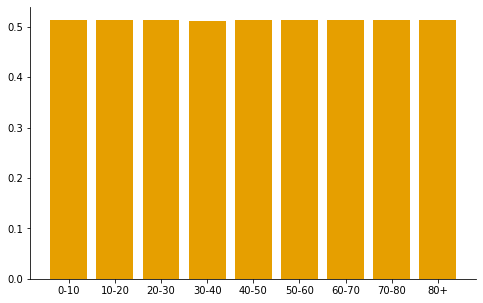

In [96]:
# Total official population per age class
Ti = T.sum(axis=0)
zi = Ti / np.matmul(np.transpose(T_eff),f)

fig, ax = plt.subplots(figsize=(8, 5))
ages = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
ax.bar(ages, zi)
ax.grid(False)

zi.max()